# Homework Assignment 3 - [30 points]

<hr>


### Imports

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
%matplotlib inline

## <u>Case Study 1</u>: Artificial Dataset Scaling Analysis
Let's learn more about how data scaling choices might affect our cluster analysis results.

In this case study we will first perform a cluster analysis on a two dimensional, artificial dataset (**dataset2.csv**) that has not been scaled. Then we will perform a cluster analysis on the scaled dataset.


### 1. Unscaled Dataset Analysis

#### 1.1. [0.25 pt] Read dataset2.csv

Read the dataset2.csv file into a dataframe. You can assume that there are no missing values in this dataset.

In [15]:
df_unscaled = pd.read_csv('dataset2.csv')

#### 1.2. [0.5 pt] Initial Plotting 
Plot this dataframe in a scatterplot. Just by looking at this scatterplot, do you think that this dataset is clusterable?

**Hint: In this problem 1.2, don't modify the upper or lower bound limits of the plot window.**

In [16]:
df_unscaled.head(3)

,x,y
0,226.975462,-1.454366
1,27.451636,9.109085
2,6.651722,0.302472


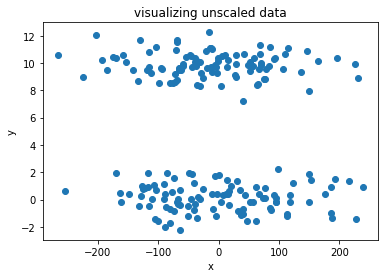

In [17]:
plt.scatter(df_unscaled.x, df_unscaled.y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('visualizing unscaled data')
plt.show()

> By looking at the plot, we can see there are two clusters present.

> We can clearly see that the two clusters are well separated.

> We can also see that scale of Y is very small compared to x, hence knn which is based on euclidean distance may not work.

#### 1.3. [0.5 pt] Describing the Numerical Variales

For each numerical variable in the dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

In [18]:
df_unscaled.describe()

,x,y
count,200.000000,200.000000
mean,-7.201801,5.014914
std,99.827520,4.980245
min,-265.917224,-2.223403
25%,-74.086095,0.149507
50%,-12.552231,4.734150
75%,64.092726,9.851294
max,238.314478,12.256723


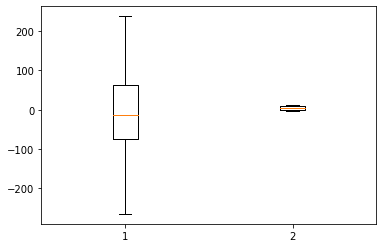

In [19]:
# visualize how each column is distributed in the dataframe df_unscaled
plt.boxplot(df_unscaled)
plt.show()

#### 1.4. [1 pt] Hopkin's Statistic for Determining Clusterability
Calculate 5 Hopkin's statistics for this dataset. Do your results suggest that this dataset is clusterable? Explain.

$ Hopkins Statistic = \frac{\sum_{i=1}^{p}w_i}{\sum_{i=1}^{p}w_i + \sum_{i=1}^{p}u_i}$

In [22]:
X = df_unscaled.copy()

In [23]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.4846105027900711, 0.40647245494206174, 0.29390018380083305, 0.3735330139562925, 0.42924465078808244]


> Out of 5 Hopkins Statistics, 5 are closer to 0.5. This suggests that dataset is not clusterable.

#### 1.5. [2 pt] t-SNE Plots for Determining Clusterability

Using 6 different perplexity values and at least two random states for each perplexity value, map this two dimensional dataset onto another two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

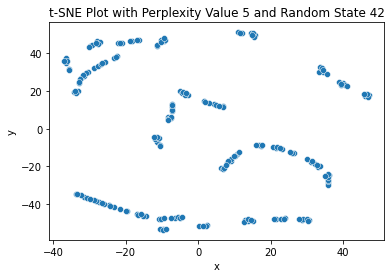

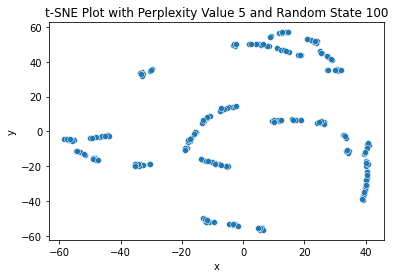

--------------------------------------------


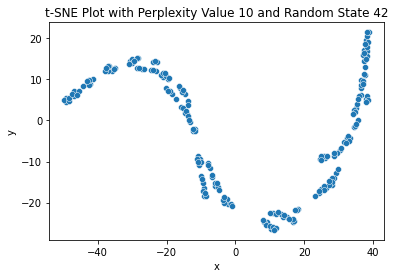

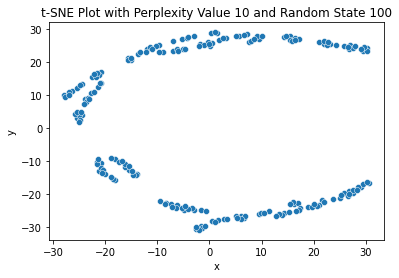

--------------------------------------------


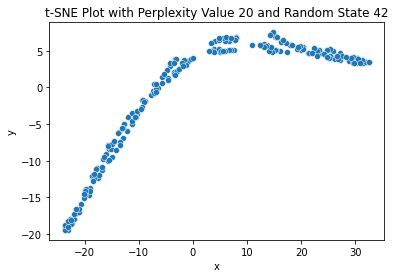

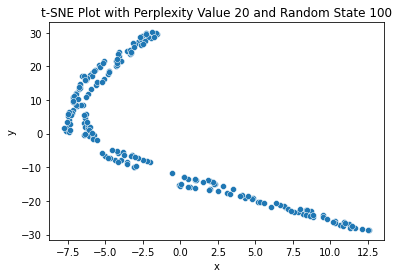

--------------------------------------------


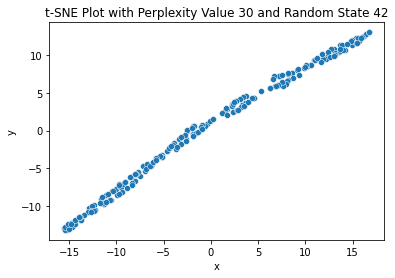

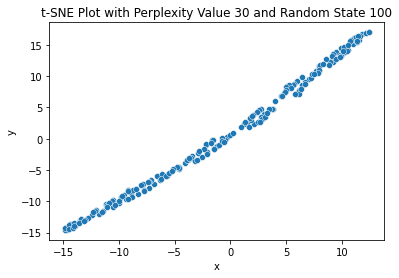

--------------------------------------------


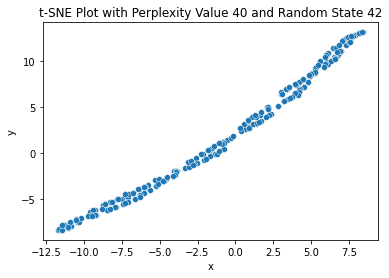

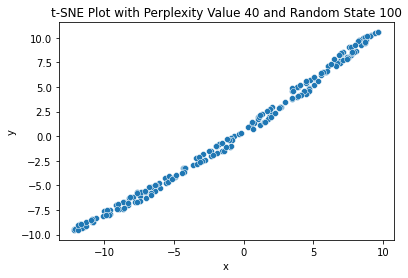

--------------------------------------------


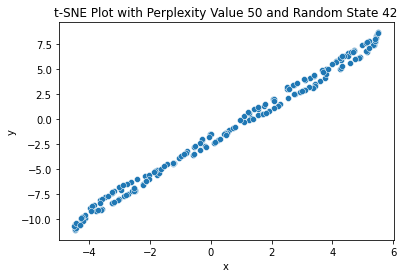

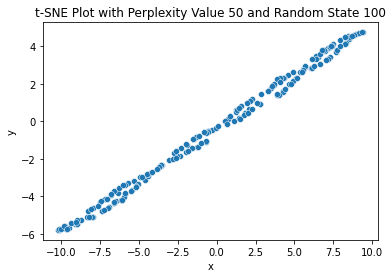

--------------------------------------------


In [27]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [42, 100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        sns.scatterplot(x='x',y='y', data=df_tsne)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 1.6. [1.75 pt] k-Means

Cluster this dataset into two clusters using k-means (and a random state of 100). Then, plot this two dimensional dataset again, color-coding the points by your resulting k-means cluster labels.

In [35]:
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)

In [36]:
X['predicted_cluster']=kmeans.labels_
X.head()

,x,y,predicted_cluster
0,226.975462,-1.454366,1
1,27.451636,9.109085,1
2,6.651722,0.302472,0
3,-122.543552,0.844363,0
4,-80.340966,-0.689550,0


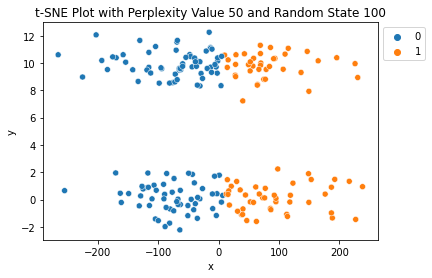

In [37]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=X)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### 1.7. [1.5 pt] Clustering Assessment

Did k-means accurately identify the clusters in the dataset? If not, explain why.

**Hint: Try plotting the dataset with an x-axis lower bound of -300 and an upper bound of 300, and a y-axis lower bound of -300 and an upper bound of 300.**

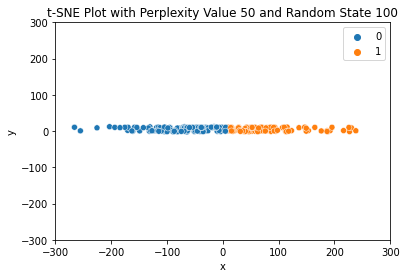

In [39]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=X)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.xlim([-300, 300])
plt.ylim([-300, 300])
plt.show()

> The k-means did not identify the clusters correctly.

> The scale of x and y is very different. While x ranges from -300 to 300, y ranges only from -2 to 2.

> Since knn works on euclidean distance, it fails to identify the clusters correctly. Distance of x dominated distance of y.

<hr>

### <u>Tutorial</u>: Variable Z-Score Scaling

We can scale the numerical attributes in each column of a dataframe by using the **StandardScaler()** function from the the **sklearn.preprocessing** package, followed by the **.fit_transform()** function.

Using the default **StandardScaler()** parameters, we standardize the variables by removing the mean and scaling to unit variance. Or in other words, we transform each observation $x$ in a given column to $z=\frac{x-\mbox{mean of column}}{\mbox{standard deviation of column}}$

In [40]:
import pandas as pd
tmp=pd.DataFrame({'col1':[100,109,99,97], 'col2': [1,6,3,8]})
tmp

,col1,col2
0,100,1
1,109,6
2,99,3
3,97,8


In [41]:
tmp.columns

Index(['col1', 'col2'], dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
scaled_array=StandardScaler().fit_transform(tmp)
scaled_array

array([[-0.27156272, -1.29986737],
       [ 1.68368888,  0.55708601],
       [-0.4888129 , -0.55708601],
       [-0.92331326,  1.29986737]])

The output of the **StandardScaler().fit_transform()** is a numpy array. Let's put this scaled dataset back into dataframe form, using the same column names from the original tmp dataframe.

In [43]:
tmp_scaled=pd.DataFrame(scaled_array, columns=tmp.columns)
tmp_scaled

,col1,col2
0,-0.271563,-1.299867
1,1.683689,0.557086
2,-0.488813,-0.557086
3,-0.923313,1.299867


<hr>

### 2. Scaled Dataset Analysis

#### 2.1. [1.5 pt] Scale the dataset

Next, with our dataframe from 1.1, create a new dataframe that has standardized the variables by removing the mean and scaling to unit variance.

In [46]:
X.head(3)

,x,y,predicted_cluster
0,226.975462,-1.454366,1
1,27.451636,9.109085,1
2,6.651722,0.302472,0


In [51]:
from sklearn.preprocessing import StandardScaler
scaled_array=StandardScaler().fit_transform(X[['x', 'y']])
scaled_array[:5]

array([[ 2.35170532, -1.30224783],
       [ 0.3480042 ,  0.8241451 ],
       [ 0.13912283, -0.94860136],
       [-1.15830976, -0.83952021],
       [-0.73449387, -1.14829254]])

In [53]:
df_scaled = pd.DataFrame(scaled_array, columns=['x', 'y'])
df_scaled.head(3)

,x,y
0,2.351705,-1.302248
1,0.348004,0.824145
2,0.139123,-0.948601


#### 2.2. [0.5 pt] Initial Plotting 
Plot this **scaled** dataframe in a scatterplot. Just by using this scatterplot, do you think that this scaled dataset is clusterable?

**Hint: In this problem, don't modify the upper or lower bound limits of the plot window.**

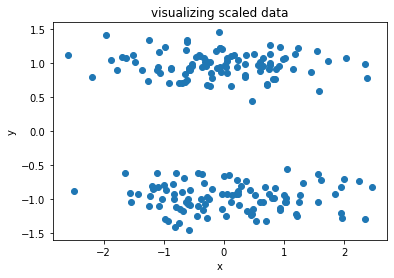

In [54]:
plt.scatter(df_scaled.x, df_scaled.y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('visualizing scaled data')
plt.show()

> Since x and y both are at same scale (z-score scaled), knn can identify the clusters.

#### 2.3. [0.5 pt] Describing the Numerical Variales

For each numerical variable in the **scaled** dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

In [55]:
df_scaled.describe()

,x,y
count,2.000000e+02,2.000000e+02
mean,-1.235123e-17,-5.884182e-17
std,1.002509e+00,1.002509e+00
min,-2.598128e+00,-1.457053e+00
25%,-6.716799e-01,-9.793927e-01
50%,-5.373124e-02,-5.651696e-02
75%,7.159692e-01,9.735497e-01
max,2.465576e+00,1.457756e+00


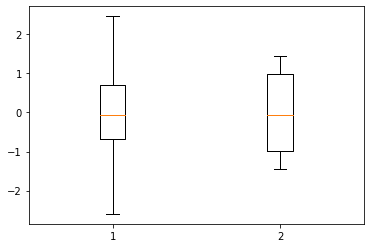

In [56]:
# visualize how each column is distributed in the dataframe df_scaled
plt.boxplot(df_scaled)
plt.show()

#### 2.4. [1 pt] Hopkin's Statistic for Determining Clusterability
Calculate 5 Hopkin's statistics for this **scaled** dataset. Do your results suggest that this **scaled** dataset is clusterable? Explain.

In [60]:
X = df_scaled.copy()

In [61]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.3232573328303871, 0.27150331667197913, 0.2903069764686669, 0.2837875792515872, 0.288074326466358]


> Out of 5 Hopkins Statistics, 5 are closer to 0.5. This suggests that according to Hopkin's statistic, dataset is not clusterable.

#### 2.5. [1.5 pt] t-SNE Plots for Determining Clusterability

Using 6 different perplexity values and at least two random states for each perplexity value, map this **scaled** dataset onto another two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

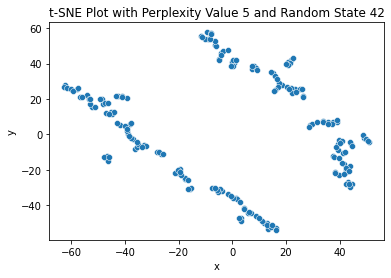

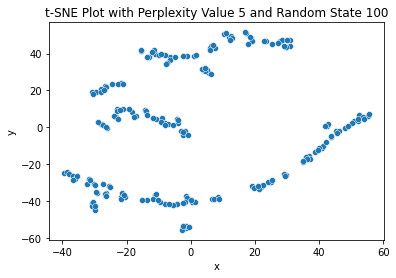

--------------------------------------------


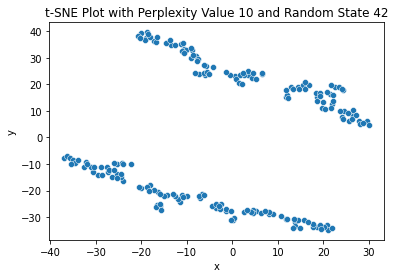

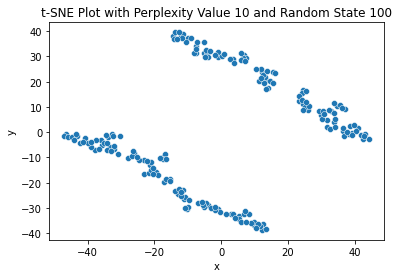

--------------------------------------------


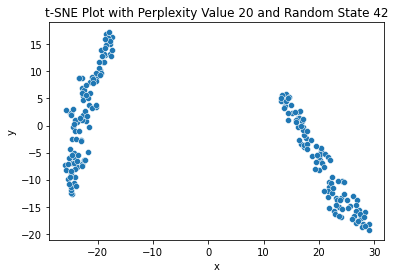

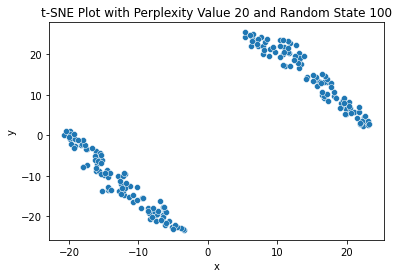

--------------------------------------------


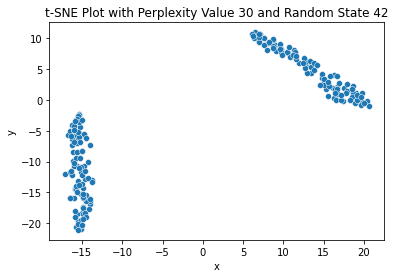

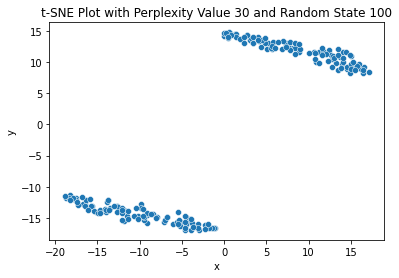

--------------------------------------------


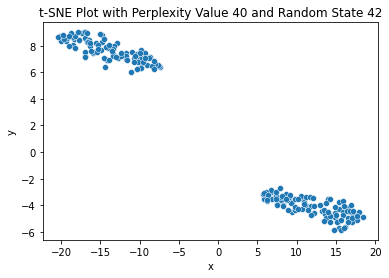

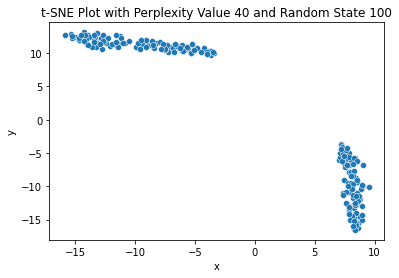

--------------------------------------------


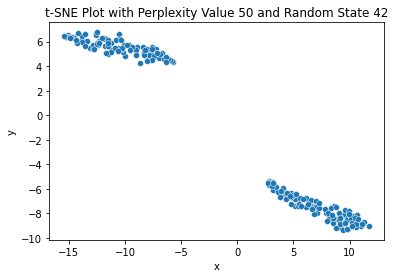

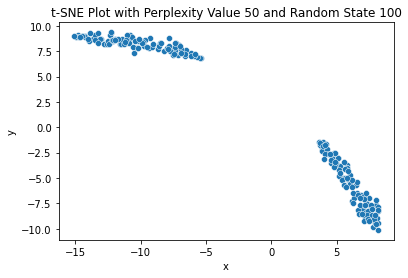

--------------------------------------------


In [62]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [42, 100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        sns.scatterplot(x='x',y='y', data=df_tsne)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 2.6. [1 pt] k-Means

Cluster this **scaled** dataset into two clusters using k-means (and a random state of 100). Then, plot this **scaled** two dimensional dataset again, color-coding the points by your resulting k-means cluster labels.

In [63]:
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)

In [64]:
X['predicted_cluster']=kmeans.labels_
X.head()

,x,y,predicted_cluster
0,2.351705,-1.302248,1
1,0.348004,0.824145,0
2,0.139123,-0.948601,1
3,-1.158310,-0.839520,1
4,-0.734494,-1.148293,1


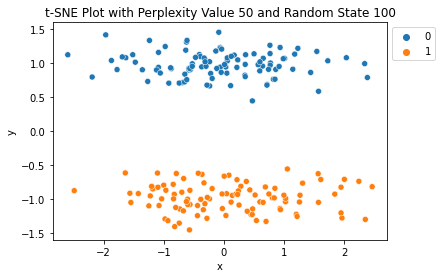

In [65]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=X)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<hr>

## <u>Case Study 2</u>: Wheat Seed Analysis

Suppose that you are biologist working for an agricultural company. Specifically, you would like to learn more about some of the biological properties of three types of wheat seeds: Kama wheat seeds, Canadian wheat seeds, and Rosa wheat seeds.

The attached seeds.csv contains seven numerical attributes for 70 Kama seeds, 70 Canadian seeds, and 70 Rosa seeds. In this analysis we would like to answer the following research questions.

### <u>Research Questions</u>:

1. Does there exist a clustering structure in this dataset?
2. If so, what can we say about the clusters in the dataset?
3. Is this dataset an ideal dataset to use with k-means?
4. How do the Kama, Canadian, and Rosa seed labels associate with the underyling clustering structure in this dataset?
5. After clustering our dataset with k-means, to what extent do our clustering results agree with the Kama, Canadian, and Rosa seed labels?
6. How cohesive and well-separated are the clusters in our k-means clustering?

### 3. Data Reading and Preprocessing

#### 3.1. [0.25 pt] Reading dataset

Read the seeds.csv dataset into a dataframe. You can assume that this dataset has no missing values.

In [66]:
df = pd.read_csv('seeds.csv')
df.head(3)

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825,kama


#### 3.2. [0.25 pt] Summary Statistics

For each numerical variable in the dataframe, show the mean, standard deviation, minimum, Q1, median, Q3, and maxium value.

In [67]:
df.describe()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.744571,14.216952,0.870452,5.612281,2.569014,3.471249,5.396648
std,2.966718,1.637514,0.024420,0.447590,0.324432,1.587030,0.490325
min,10.590000,12.000000,0.808100,4.899000,2.017000,0.765100,4.519000
25%,12.190000,12.605000,0.856900,5.225250,2.271250,2.226250,5.045000
50%,14.280000,14.280000,0.872700,5.523500,2.649500,2.827500,5.210000
75%,17.250000,15.707500,0.887775,5.979750,2.805500,4.768000,5.877000
max,21.180000,17.250000,0.918200,6.675000,4.022000,8.456000,6.550000


#### 3.3. [1 pt] Attribute Influence in k-Means

If we were to apply k-means to this dataset, do you think that certain numerical variables in this dataset that are more likely to dominate the results of k-means more than others? Explain.

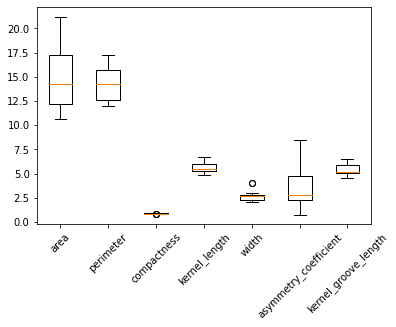

In [79]:
plt.boxplot(df.iloc[:, :-1])
plt.xticks([1,2,3,4,5,6,7], df.columns[:-1], rotation=45)
plt.show()

> Since scaling of each variable is different, the variables such as area, perimeter will dominate the clustering generation since their values are much higher compared to other variables.

> Since knn works on euclidean distance, it will fail to correctly identify clusters

#### 3.4. [1.5 pt] Scale the dataset

Create a copy of your dataframe from 3.1 that is comprised of just the numerical variables. Then create a new dataframe (or overwrite this dataframe) that has scaled the numerical variables.

In [81]:
X = df.copy()
labels = X.seed_class
X = X.iloc[:, :-1]
X.head(3)

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825


In [83]:
scaled_array=StandardScaler().fit_transform(X)
scaled_array[:5]

array([[ 0.17415213,  0.38139295,  0.02247825,  0.33529961, -1.10305944,
        -0.78967363, -0.36112728],
       [ 0.04575837,  0.2161149 ,  0.43705533, -0.13052167, -1.07216265,
        -1.54950444, -0.90083226],
       [-0.15358982, -0.07771275,  1.41808427, -0.71951684, -1.05671426,
        -0.48776247, -1.16864042],
       [-0.64351335, -0.78167482,  1.02813553, -0.86956504, -0.89605096,
        -0.76567233, -1.20952716],
       [ 0.47148503,  0.47321409,  1.31136146,  0.10238897, -0.02167189,
        -1.39981209, -0.45312245]])

In [86]:
df_scaled = pd.DataFrame(scaled_array, columns=X.columns)
df_scaled.head(3)

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
0,0.174152,0.381393,0.022478,0.335300,-1.103059,-0.789674,-0.361127
1,0.045758,0.216115,0.437055,-0.130522,-1.072163,-1.549504,-0.900832
2,-0.153590,-0.077713,1.418084,-0.719517,-1.056714,-0.487762,-1.168640


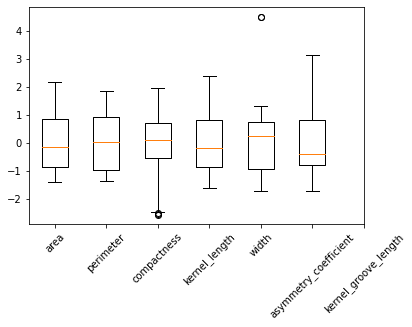

In [89]:
plt.boxplot(df_scaled.iloc[:, :-1])
plt.xticks([1,2,3,4,5,6,7], df_scaled.columns, rotation=45)
plt.show()

### 4. Pre-Cluster Analysis

#### 4.1. [1.5 pt] t-SNE Plots

Using 6 different perplexity values and at least two random states for each perplexity value, map your scaled seeds dataset onto a two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value. **In addition, for each of these scatterplots, you should color-code the points by the corresponding label in the seed_class column.**

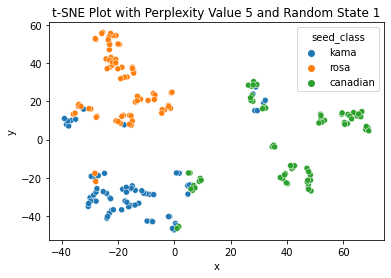

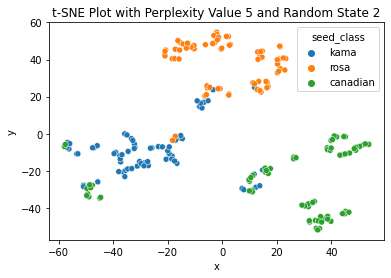

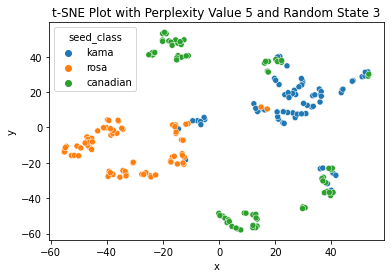

--------------------------------------------


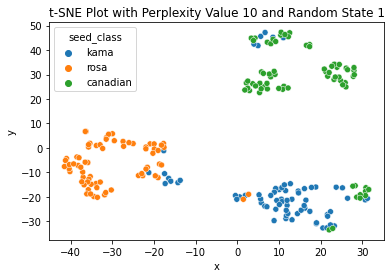

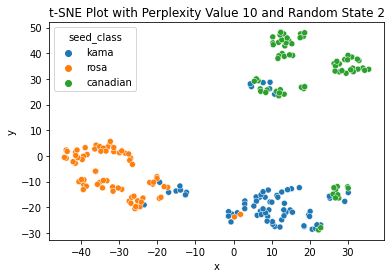

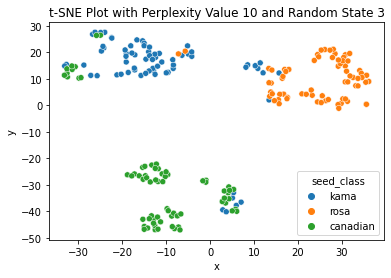

--------------------------------------------


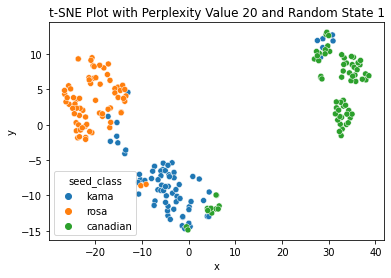

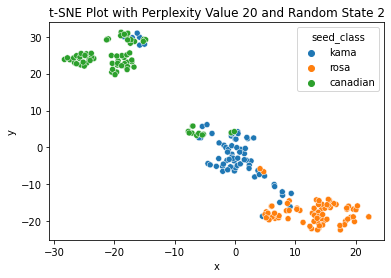

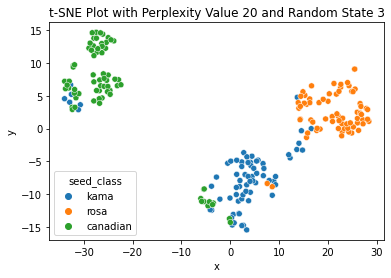

--------------------------------------------


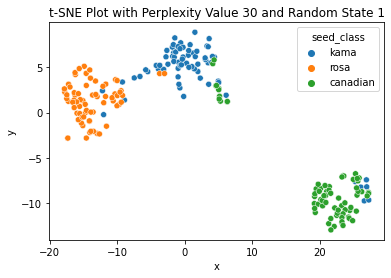

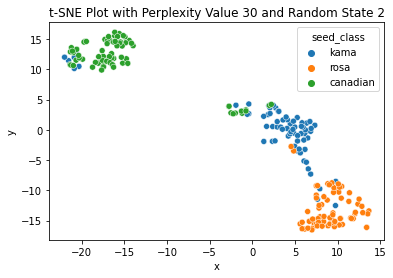

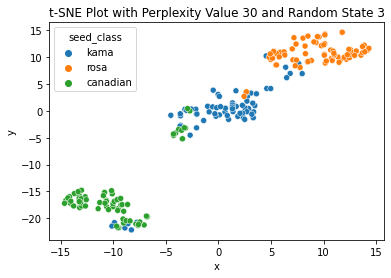

--------------------------------------------


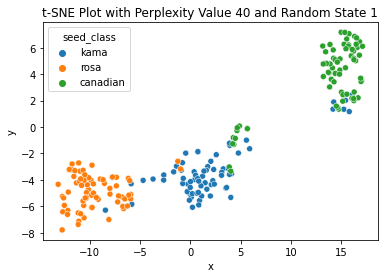

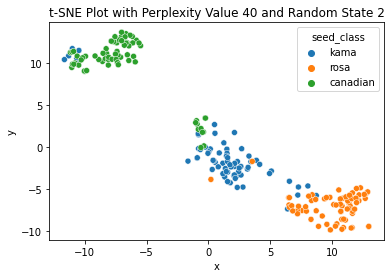

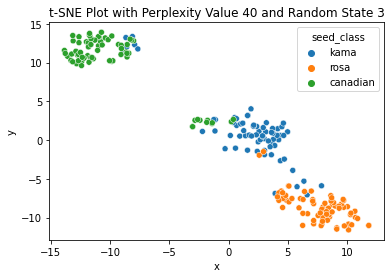

--------------------------------------------


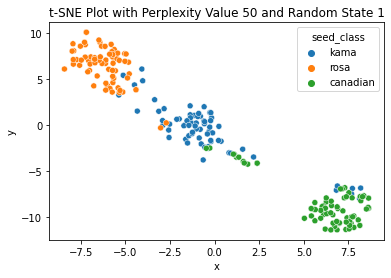

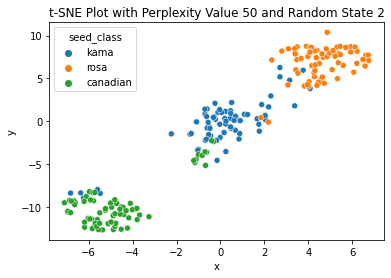

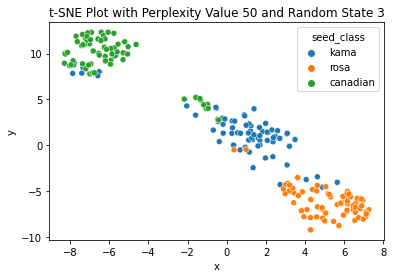

--------------------------------------------


In [119]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2,3]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([labels, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='seed_class', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 4.2. [5 pt - 1 pt for each question] Use your t-SNE plots to answer the following questions.

* <u>4.2.1.</u> Do these plots suggest that the scaled dataset is clusterable? Explain.

> With perplexity of 20 or 30 and random state of 1, there seems to be three clusters visible with some objects overlapping in other clusters.

> Even though there is not a clear spherical shape, the clusters seem well separated. Based on these, I think the scaled dataset is clusterable.

* <u>4.2.2.</u> How many clusters are in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

> Based on t-SNE plots with perplexity above 10, three clusters seems to be a good choice since in some of the plots e.g. perplexity = 20 and random state 1, these clusters are well separted.

* <u>4.2.3.</u> What are the shapes of the clusters in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

> Its hard to suggest the shape of clusters since the shapes generated in t-SNE plots are very random and lack consistency with different perplexity values and random states.


* <u>4.2.4.</u> Are the clusters in the scaled well-separated? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

> Since some of the objects in most of the t-SNE plots overlap with other clusters, the clusters are not well separated except With perplexity of 20 or 30 and random state of 1.

* <u>4.2.5.</u> Are the clusters in the scaled dataset roughly balanced in size? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).

> Based on the t_SNE plots, the clusters in the scaled dataset are roughtly balanced.

#### 4.3. [1 pt] Pick one t-SNE plot.

Of the plots that you created above, pick a perplexity value and random state that best reflects what you suggested in your answers to the questions in 4.2 and show the corresponding t-SNE plot below.

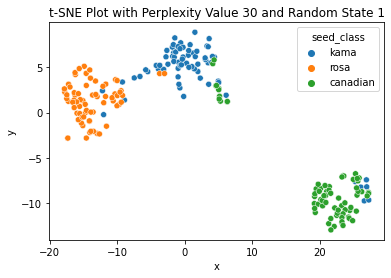

In [120]:
for perp in [30]:
    for rs in [1]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([labels, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='seed_class', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()

#### 4.4. [1 pt] Underlying Clustering Structure and Seed Class Association

Is there a one-to-one correspondence between the three seed classes and the clusters identified by the t-SNE algorithm? If not, describe the relationship.

> There is not a one to one relation with actual labels and t-SNE clusters since some of the objects jump from one cluster to aonther as can be seen from above plot.

### 5. Cluster Analysis

#### 5.1 [2 pt] k-means Clustering

Next, cluster your scaled seeds dataset into three clusters (using a random state of 100 and k-means). Then plot your t-SNE plot from 4.3 again, this time color-coding your points by the cluster labels selected by k-means.

In [121]:
df_scaled.head(2)

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,predicted_cluster
0,0.174152,0.381393,0.022478,0.335300,-1.103059,-0.789674,-0.361127,1
1,0.045758,0.216115,0.437055,-0.130522,-1.072163,-1.549504,-0.900832,1


In [122]:
kmeans = KMeans(n_clusters=3, random_state=100).fit(df_scaled)

In [123]:
df_scaled['predicted_cluster']=kmeans.labels_
df_scaled.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,predicted_cluster
0,0.174152,0.381393,0.022478,0.335300,-1.103059,-0.789674,-0.361127,2
1,0.045758,0.216115,0.437055,-0.130522,-1.072163,-1.549504,-0.900832,2
2,-0.153590,-0.077713,1.418084,-0.719517,-1.056714,-0.487762,-1.168640,2
3,-0.643513,-0.781675,1.028136,-0.869565,-0.896051,-0.765672,-1.209527,2
4,0.471485,0.473214,1.311361,0.102389,-0.021672,-1.399812,-0.453122,2


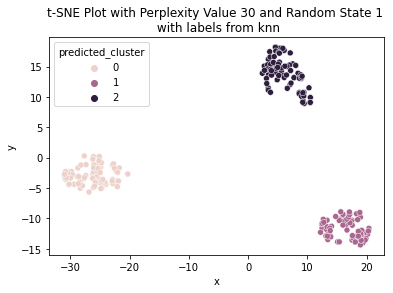

In [124]:
for perp in [30]:
    for rs in [1]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_scaled['predicted_cluster'], df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s \n with labels from knn' %(perp, rs))
        plt.show()

### 6. Post-Cluster Analysis

#### 6.1. [1 pt] Cluster labels and pre-assigned class labels comparision

Calculate the adjusted rand score between the k-means clustering that you created in 5.1 and the seed class labels. Then interpret this value.

In [125]:
adjusted_rand_score(df_scaled['predicted_cluster'], labels)

0.707907440039134

> The adjusted rand score is closer to 1, it suggests that the cluster labels generated by k-means and actual labels partially match.

#### 6.2. [1 pt] Calculate the average silhouette score of the clustering you created in 5.1.

In [126]:
silhouette_score(df_scaled.iloc[:, :-1], df_scaled['predicted_cluster'])

0.4257790203211548

#### 6.3. [1 pt] Create a silhouette plot for the clustering that you created in 5.1.

In [127]:
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm
    
    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))    

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()
    
    return

For n_clusters = 3 The average silhouette_score is : 0.4257790203211548


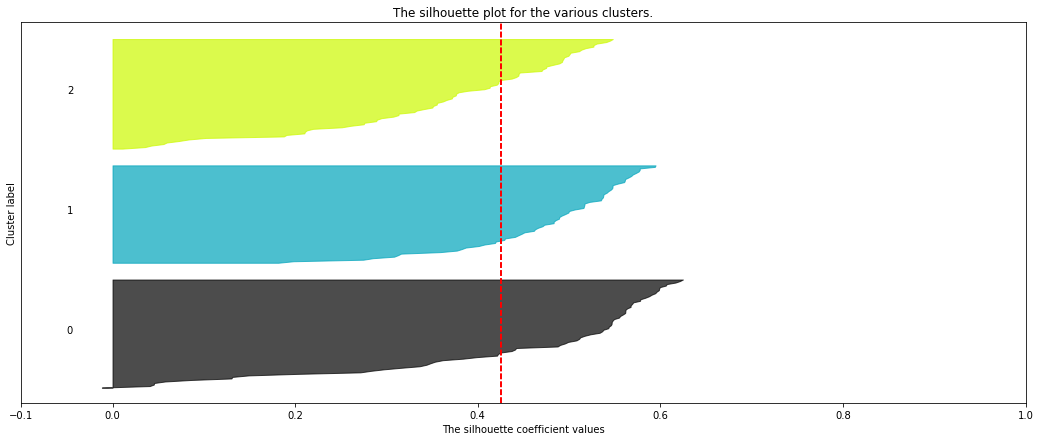

In [128]:
show_silhouette_plots(df_scaled.iloc[:, :-1], df_scaled['predicted_cluster'])

#### 6.4. [0.5 pt] Which cluster in the dataset has the worst cohesion and separation? Explain.

> Based on above silhouette plot, we can see that some of the objects in cluster 0 have negative silhouette score. This suggests that it has worst separation among the clusters.

> Its hard to choose which cluster has worst cohesion between cluster 0 and cluster 2, But Cluster 2 has worst cohesion since on average many objects have less silhoutte scores and the nose is sharper (meaning less objects having high silhoutte scores).